In [87]:
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv('../data/telecom_churn.csv')

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [89]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import metrics 
import seaborn as sns
%matplotlib inline

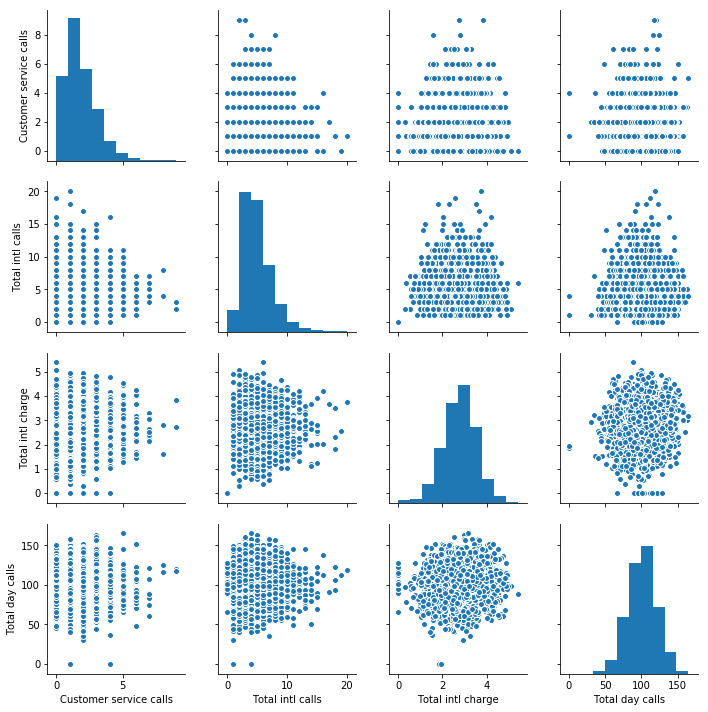

In [23]:
sns.pairplot(df[["Customer service calls", "Total intl calls", "Total intl charge", "Total day calls"]])

## Линейная регрессия методом наименьших квадратов

In [90]:
X = df[["Customer service calls", "Total intl calls", "Total intl charge"]].to_numpy()
Y = df[["Total day calls"]].to_numpy()

In [10]:
1010X.shape
#X

(3333, 3)

In [11]:
Y.shape

(3333, 1)

In [7]:
np.random.randn(3)

array([ 1.01200908, -0.70385117,  0.87155149])

In [35]:
X_concat = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
X_concat

array([[ 1.  ,  1.  ,  3.  ,  2.7 ],
       [ 1.  ,  1.  ,  3.  ,  3.7 ],
       [ 1.  ,  0.  ,  5.  ,  3.29],
       ...,
       [ 1.  ,  2.  ,  6.  ,  3.81],
       [ 1.  ,  2.  , 10.  ,  1.35],
       [ 1.  ,  0.  ,  4.  ,  3.7 ]])

In [12]:
class MyLinearRegression():
    def __init__(self, betas=None):
        self.betas = betas

    def fit(self, X, Y):
        X_transform = np.concatenate((np.ones((X.shape[0],1)), X), axis=1) # Добавляем массив единиц
        X_transpose = X_transform.T # Транспонируем матрицу
        X_inv = np.linalg.inv(X_transpose.dot(X_transform)) # Вычисляем обратную матрицу
        self.betas = X_inv.dot(X_transpose).dot(Y)


    def predict(self, X):
        X_transform = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return X_transform.dot(self.betas)

In [1]:
class MyGradientDescentRegression():
    def __init__(self, betas=None, learning_rate=0.01, num_iter=100, verboose=False):
        self.betas = betas
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.verboose=verboose

    def fit(self, X, Y):
        Y_ = np.ndarray.flatten(Y)
        X_transform = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.betas = np.random.randn(X_transform.shape[1]) # Инициализируем коэффициенты случайными значениями
        for i in range(1, self.num_iter):
            prediction = self.predict(X)
            error = (prediction-Y_)**2
            n = Y_.shape[0]
            # Для расчета градиента умножаем матрицу X на матрицу ошибок
            grad = (1/n)*self.learning_rate*(X_transform.T.dot(error))
            self.betas = self.betas - grad
            cost = (1/2*n)*np.sum(np.square(error))
            if self.verboose:
                print(self.betas)
                print("Iteration: {it}  Cost: {c}".format(it=str(i), c=str(cost)))



    def predict(self, X):
        X_transform = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return X_transform.dot(self.betas)

In [2]:
model = MyGradientDescentRegression(verboose=True)
model.fit(X, Y)

NameError: name 'X' is not defined

In [109]:
model.betas

array([-0.54222262, -0.1715175 ,  0.55996595,  0.30162181])

In [82]:
model = MyLinearRegression()
model.fit(X, Y)
model.betas

array([[ 9.91780220e+01],
       [-2.84870919e-01],
       [ 2.89843664e-02],
       [ 5.68983005e-01]])

In [110]:
Y_pred = model.predict(X)
zip(Y, Y_pred)

[(array([110]), 1.7805366290508795),
 (array([123]), 2.082158442424692),
 (array([114]), 3.2499429002204008),
 (array([71]), 3.571390867735568),
 (array([113]), 1.4465502864058621),
 (array([98]), 3.330330168333967),
 (array([88]), 3.4752788225559055),
 (array([79]), 3.3966869672762057),
 (array([97]), 2.2349349457479732),
 (array([84]), 3.168505010609471),
 (array([137]), 3.1660659113781993),
 (array([127]), 2.9995967951201363),
 (array([96]), 1.3170896579525717),
 (array([88]), 2.744439059052268),
 (array([70]), 3.199244310849319),
 (array([67]), 4.2517687931655725),
 (array([139]), 2.6511730482038347),
 (array([114]), 1.2836745071840032),
 (array([66]), 2.9004685318067356),
 (array([90]), 1.4648843465057397),
 (array([117]), 2.5602795690917333),
 (array([89]), 2.4244831855785773),
 (array([112]), 10.87229851388225),
 (array([103]), 3.101911460369784),
 (array([86]), 1.4162179212659725),
 (array([76]), 3.006850036687485),
 (array([115]), 1.9128432918353995),
 (array([73]), 2.38052728

In [106]:
metrics.r2_score(Y_pred, Y)

/home/makilins/.local/lib/python2.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/home/makilins/.local/lib/python2.7/site-packages/sklearn/metrics/regression.py:543: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/home/makilins/.local/lib/python2.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/makilins/.local/lib/python2.7/site-packages/sklearn/metrics/regression.py:553: RuntimeWarning: invalid value encountered in true_divide
  denominator[valid_score])


nan

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X, Y)
print(model.intercept_)
print(model.coef_)

[99.17802205]
[[-0.28487092  0.02898437  0.568983  ]]


In [47]:
model.predict(X)

array([[100.51635834],
       [101.08534134],
       [101.19489796],
       ...,
       [100.95001165],
       [ 99.66625093],
       [101.39919663]])